In [109]:
!pwd

/Users/kazuichirotaira/Documents/Development/画像認識


In [110]:
import cv2

In [111]:
img_name = 'pug_test.jpg'

In [112]:
cv2.imread(img_name)

array([[[ 97, 129, 105],
        [ 93, 125, 101],
        [ 86, 120,  96],
        ...,
        [ 55, 123,  88],
        [ 55, 123,  88],
        [ 55, 123,  88]],

       [[ 97, 129, 105],
        [ 94, 126, 102],
        [ 87, 121,  97],
        ...,
        [ 55, 123,  88],
        [ 55, 123,  88],
        [ 55, 123,  88]],

       [[ 98, 130, 106],
        [ 94, 126, 102],
        [ 88, 122,  98],
        ...,
        [ 55, 123,  88],
        [ 55, 123,  88],
        [ 55, 123,  88]],

       ...,

       [[ 26, 114,  84],
        [ 25, 113,  83],
        [ 22, 108,  78],
        ...,
        [ 57, 131, 103],
        [ 59, 133, 107],
        [ 62, 136, 110]],

       [[ 26, 114,  84],
        [ 25, 113,  83],
        [ 21, 107,  77],
        ...,
        [ 59, 134, 106],
        [ 62, 136, 110],
        [ 66, 140, 114]],

       [[ 25, 113,  83],
        [ 24, 112,  82],
        [ 21, 107,  77],
        ...,
        [ 67, 142, 114],
        [ 68, 145, 118],
        [ 71, 148, 121]]

In [113]:
myimg = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE)
print(myimg)

[[118 114 109 ... 105 105 105]
 [118 115 110 ... 105 105 105]
 [119 115 111 ... 105 105 105]
 ...
 [ 95  94  89 ... 114 117 120]
 [ 95  94  88 ... 117 120 124]
 [ 94  93  88 ... 125 128 131]]


In [114]:
#cv2.namedWindow("preview")
#cv2.imshow('preview',myimg)
#key = cv2.waitKey(5000)

In [115]:
from IPython.display import display, Image

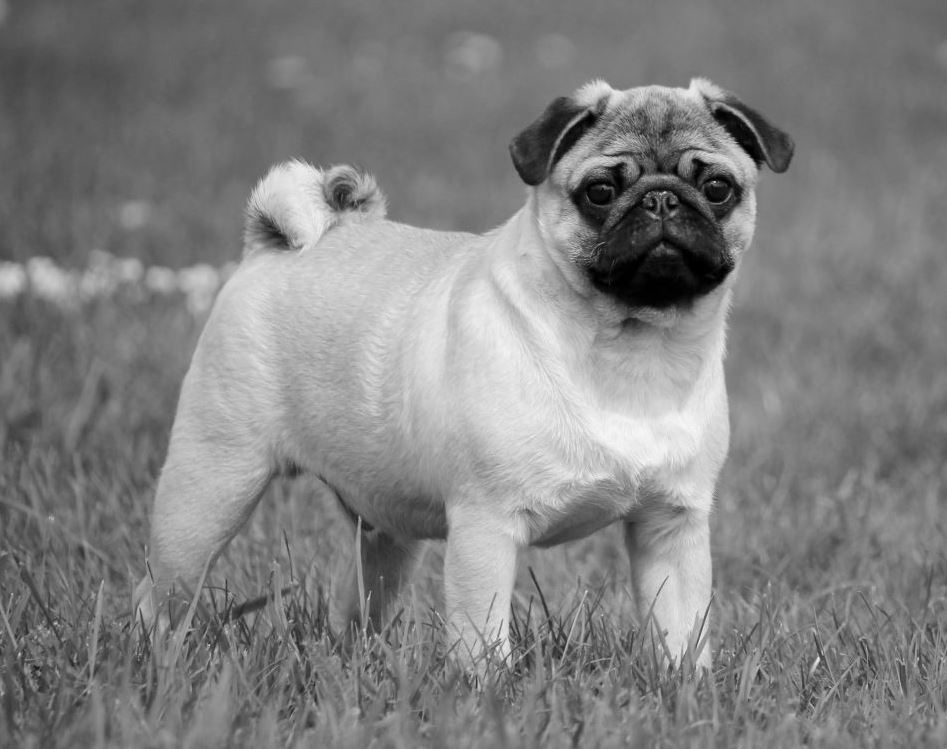

In [116]:
cv2.imshow('pug',myimg)
decoded_bytes = cv2.imencode('.jpg', myimg)[1].tobytes()
display(Image(data=decoded_bytes))

In [117]:
face_data_dir = cv2.data.haarcascades
print(face_data_dir)
face_data_name = "haarcascade_frontalface_default.xml"


/Users/kazuichirotaira/anaconda3/lib/python3.7/site-packages/cv2/data/


In [118]:
cv2.CascadeClassifier(face_data_dir+face_data_name)

<CascadeClassifier 0x110eaecb0>

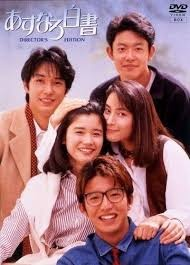

In [119]:
img_name2 = 'kiutaku.jpeg'
myimg2 = cv2.imread(img_name2)
#print(myimg2)
from IPython.display import display, Image
cv2.imshow('kiutaku',myimg2)
decoded_bytes = cv2.imencode('.jpeg', myimg2)[1].tobytes()
display(Image(data=decoded_bytes))

bunruiki_ki = cv2.CascadeClassifier(face_data_dir+face_data_name)
#bunruiki_ki?
myimg2_gs = cv2.cvtColor(myimg2, cv2.COLOR_BGR2GRAY)

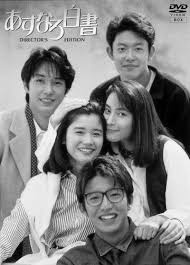

In [120]:
cv2.imshow('kiutaku',myimg2_gs)
decoded_bytes = cv2.imencode('.jpeg', myimg2_gs)[1].tobytes()
display(Image(data=decoded_bytes))

In [121]:
faces = bunruiki_ki.detectMultiScale(
    myimg2_gs,
    scaleFactor=1.1,
    minNeighbors= 15, # 信頼度に関するパラメーター いい加減さ  3, 10, 20
    minSize=(25,25)
)

In [122]:
faces

array([[ 24,  64,  48,  48],
       [105,  28,  51,  51],
       [ 61, 113,  50,  50],
       [ 77, 175,  54,  54]], dtype=int32)

In [123]:
str(len(faces))+'人'

'4人'

In [124]:
color = (0, 255, 0)
for face in faces:
    x,y,w,h = face
#   print(x,y,w,h)
    cv2.rectangle(myimg2, (x,y), (x+w, y+h), color, thickness=1)

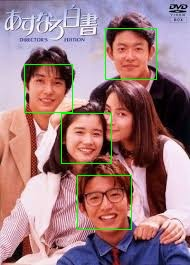

In [125]:
cv2.imshow('kiutaku_output',myimg2)
decoded_bytes = cv2.imencode('.jpeg', myimg2)[1].tobytes()
display(Image(data=decoded_bytes))